<a href="https://colab.research.google.com/github/karanbhatt1/DeepLearningModels/blob/main/CitrusFruitClassificationUsingDeeplearninng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CITRUS FRUIT CLASSIFICATION USING DEEP LEARNING

> There are total 8 classes of citrus fruits.
<br>
> The dataset is formated in correct manner.
<br>
> Dataset contains 18669 images.
<br>
> Channel is BGR.



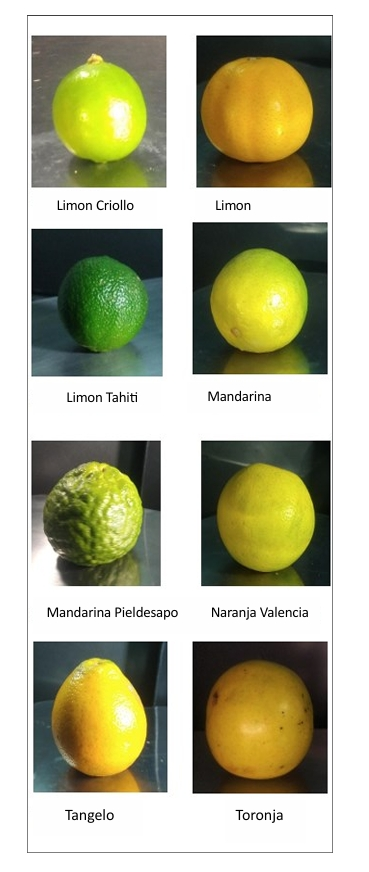

# Importing Important Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from google.colab.patches import cv2_imshow
import os
import pickle

# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Function to load dataset from folder and add in lists

In [ ]:
def load_images_from_folder(dataset_path, target_size=(128, 128)):
    images = []
    labels = []
    class_names = os.listdir(dataset_path)

    for label, class_folder in enumerate(class_names):
        folder_path = os.path.join(dataset_path, class_folder)
        if not os.path.isdir(folder_path):
            continue

        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv.imread(img_path)

            if img is not None:
                img = cv.resize(img, target_size)  # Resize all images
                images.append(img)
                labels.append(label)  # numeric label

    return np.array(images), np.array(labels), class_names


In [ ]:
train_path = '/content/drive/MyDrive/Datasets/CITRICOS_COL/train'

In [ ]:
train_images = load_images_from_folder(train_path)

# Using Pickle to save the variables in drive

In [8]:
# 1. Define the path where you want to save the file in your Google Drive
save_path = '/content/drive/MyDrive/Datasets/train_images_data.pkl'

In [9]:
import pickle

# 1. To save the file in drive or the specified path.
# 2. Open the file in write-binary ('wb') mode and save the variable
# print("Saving train_images...")
# with open(save_path, 'wb') as f:
#     pickle.dump(train_images, f)
# print("Variable saved successfully!")

In [10]:
# 2. Open the file in read-binary ('rb') mode and load the variable
print("Loading train_images...")
with open(save_path, 'rb') as f:
    train_images = pickle.load(f)
print("Variable loaded successfully!")
# Now you can use 'loaded_train_images' just like your original 'train_images'

Loading train_images...


KeyboardInterrupt: 

In [4]:
train_images[0].shape # Dataset contains 18669 images with dimensions 128*128

(18669, 128, 128, 3)

# Visualization  and Normalization of dataset.

> Rescaling of dataset.


In [ ]:
fig, axes = plt.subplots(10,5, figsize=(15, 20))
for i, ax in enumerate(axes.flatten()):
  img = tr_image[i]
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  ax.imshow(img_rgb)
  ax.set_title(f"{class_name[0]} Image {i+1}")
  ax.axis('off')

In [ ]:
#Normalizing the dataset:
train_normalized = tr_image.astype('float32')/255.0

# Saving The normalized Training images:

In [11]:
normal_save_path = '/content/drive/MyDrive/Datasets/train_normalized_data.pkl'

In [ ]:
print("Loading train_images...")
with open(normal_save_path, 'rb') as f:
    train_normalized = pickle.load(f)
print("Variable loaded successfully!")

In [ ]:
img = train_normalized[0]
plt.imshow(img)

# preparing Model for training
# AND Saving the compiled model as pkl file

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1,0.1),
    layers.RandomContrast(0.1),
    layers.RandomFlip('horizontal')
])

In [15]:
def custom_model():
  model = Sequential([
      #CNN
      data_augmentation,
      layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(16, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(8, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),

      # ANN
      layers.Dense(128, activation='relu'),
      layers.Dense(8, activation='softmax'), # here we have 8 classes
  ])
  return model

In [ ]:
model = custom_model()

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', Precision(), Recall(), AUC()]
)

In [18]:
compiled_model = '/content/drive/MyDrive/Datasets/compiled_model.pkl'

In [20]:
print("loading...")
with open(compiled_model, 'rb') as f:
  model = pickle.load(f)
print("Loaded Successfully..")

loading...
Loaded Successfully..


<h1> As the dataset is so big to fit in the RAM </h1>

> So we are using custom generator or standard keras generator to make the batch of data and train the model.

# Custom Data Generator

In [33]:
train_data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [34]:
val_data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [35]:
train_data = train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/CITRICOS_COL/train',
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 18669 images belonging to 8 classes.


In [37]:
vali_data = data_gen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/CITRICOS_COL/super_test', # Super test
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation' # Set as validation data
)

Found 90 images belonging to 8 classes.


# Callbacks
1. ModelCheckpoint - [To save the best model]
2. EarlyStopping   - [ To stop the training process when accuracy is not incresing or any metric ]

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [40]:
model_checkpoint = ModelCheckpoint(
    filepath = '/content/drive/MyDrive/Datasets/model_checkpoint.h5',
    monitor = 'val_loss',
    save_best_only = True,
)

In [41]:
early_callback = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 3
)

# Fitting the Model

In [ ]:
model.fit(train_data, validation_data=vali_data, epochs=10, callbacks=[model_checkpoint,early_callback])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 60/584 ━━━━━━━━━━━━━━━━━━━━ 2:09:12 15s/step - accuracy: 0.1805 - auc: 0.5858 - loss: 2.0248 - precision: 0.0511 - recall: 0.0013